In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%run -i 'functions.py'


In [5]:
pd.set_option('display.max_columns', None)
df= pd.read_csv('final1.csv')
df.drop(['Unnamed: 0'],axis=True,inplace=True)

In [6]:
EWR= df[df['ORIGIN_STATE_ABR'] == 'NJ']
EWR

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
25666,1,1,26,6,2019-01-26,UA,758,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,613.0,13.0,907.0,-22.0,0.0,322.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
25667,1,1,26,6,2019-01-26,UA,703,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,754.0,-6.0,1032.0,-57.0,0.0,319.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25669,1,1,26,6,2019-01-26,UA,600,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1950.0,-10.0,2228.0,-55.0,0.0,314.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25673,1,1,26,6,2019-01-26,UA,204,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,855.0,-5.0,1148.0,-27.0,0.0,302.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25675,1,1,25,5,2019-01-25,UA,2394,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1357.0,-3.0,1702.0,-21.0,0.0,332.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35565,4,12,8,7,2019-12-08,UA,2023,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1259.0,-1.0,1616.0,7.0,0.0,345.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
35568,4,12,8,7,2019-12-08,UA,1871,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1903.0,3.0,2227.0,2.0,0.0,337.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
35569,4,12,8,7,2019-12-08,UA,1702,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1059.0,-1.0,1424.0,15.0,0.0,355.0,2454.0,0.0,0.0,15.0,0.0,0.0,False,True,False,3,False,False,True,False,False
35570,4,12,8,7,2019-12-08,UA,1460,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1603.0,3.0,1912.0,-2.0,0.0,341.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False


# Airport: EWR

This is a vsiual of all the airlines in the airport EWR which fly to LAX. We can see United Airlines has many more flights to LAX than Alaska Airlkines.

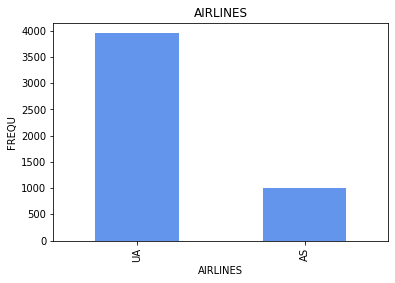

<Figure size 1296x360 with 0 Axes>

In [9]:
Airlines(EWR['OP_UNIQUE_CARRIER'])

In [7]:
EWR['OP_UNIQUE_CARRIER'].value_counts()

UA    3950
AS    1005
Name: OP_UNIQUE_CARRIER, dtype: int64

Below are the flight days in which had the longest arrival delay to its destination of LAX. 

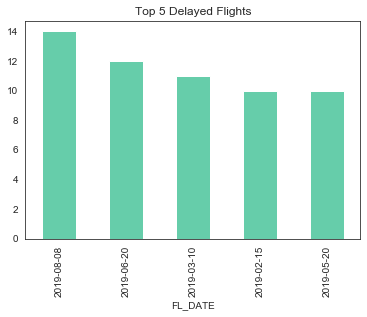

In [133]:
EWR[EWR['ARR_DELAY'] > 14].groupby(['FL_DATE']).size().nlargest().plot(kind='bar',color='mediumaquamarine', title='Top 5 Delayed Flights')

It taste an average of 320 minutes (5hours and 20 minutes) to fly form EWR to LAX. 

In [11]:
EWR['AIR_TIME'].describe()

count    4955.000000
mean      320.125933
std        36.713479
min         0.000000
25%       311.000000
50%       322.000000
75%       334.000000
max       401.000000
Name: AIR_TIME, dtype: float64

It seems United Airlines has a quicker flight time than Alaska Airlines. We will look into that later on.

In [12]:
EWR.groupby('OP_UNIQUE_CARRIER').agg({'AIR_TIME': ['mean']})

,AIR_TIME
,mean
OP_UNIQUE_CARRIER,
AS,325.256716
UA,318.820506


I have identified the longest flight in 2019, it was an Alaska Airlines flight on March 2,2019. It took 401 minutes, or 6 hours and 41 minutes. 

In [13]:
EWR[EWR['AIR_TIME']==EWR['AIR_TIME'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
27524,1,3,2,6,2019-03-02,AS,1161,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,747.0,17.0,1245.0,110.0,0.0,401.0,2454.0,17.0,0.0,93.0,0.0,0.0,True,False,False,2,True,False,True,False,False


These are 4 Cancelled flights that were schduled to leave delayed before they were cancelled. EWR had a total of 68 cancelled flights to LAX

In [14]:
late2 =EWR[(EWR['DEP_TIME'] > 0) & (EWR['CANCELLED'] ==1)]
late2

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
30549,3,7,28,7,2019-07-28,AS,343,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1556.0,-4.0,0.0,0.0,1.0,0.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,True,1,False,False,False,False,False
30730,3,7,21,7,2019-07-21,UA,275,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1927.0,87.0,0.0,0.0,1.0,0.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,True,1,False,False,False,False,False
32107,3,8,22,4,2019-08-22,AS,331,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1921.0,-4.0,0.0,0.0,1.0,0.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,True,1,False,False,False,False,False
32153,3,9,13,5,2019-09-13,AS,331,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1933.0,8.0,0.0,0.0,1.0,0.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,True,1,False,False,False,False,False


# Flight Statuses by Airline

Before analyzing the airlines, I shall mentioned delayed flights are cateorgized as departing late. There are a few flights in which departed on time but arrived late due to other issues we look into later on. 

In [9]:
AS= EWR[EWR['OP_UNIQUE_CARRIER'] == 'AS']
UA=EWR[EWR['OP_UNIQUE_CARRIER'] == 'UA']

## Alaska Airlines

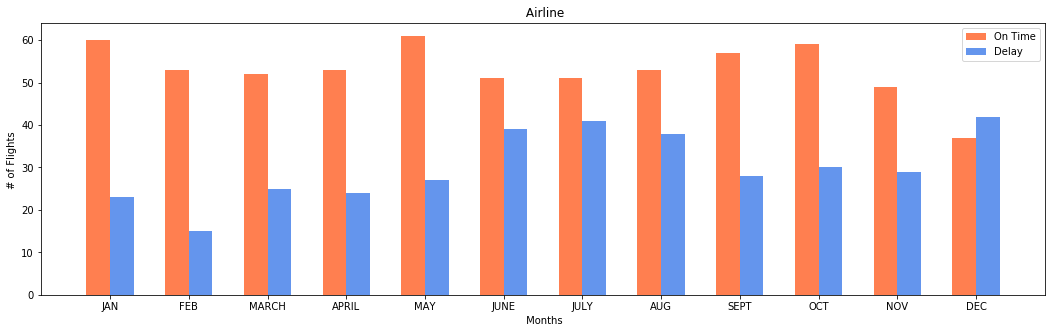

In [16]:
airline(AS)

## Unites Airlines

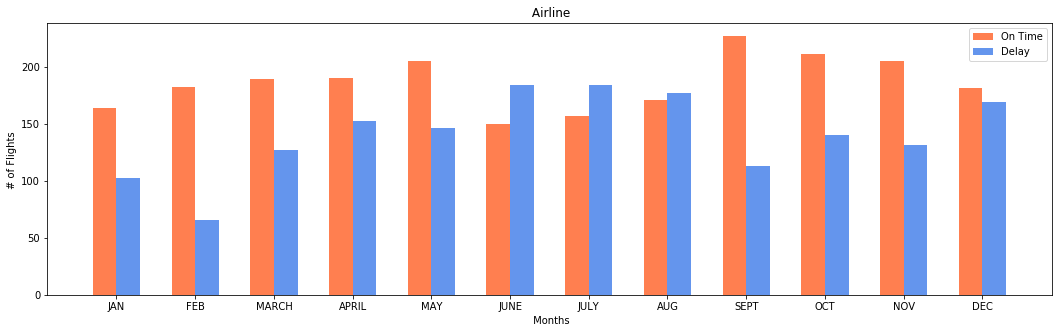

In [17]:
airline(UA)

We can see in the months June through August, United Airlines had more delayed flights than on time flights. 

# Alaska Airlines

In [10]:
AS

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
25743,1,1,22,2,2019-01-22,AS,1161,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,724.0,-6.0,1047.0,-3.0,0.0,350.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25745,1,1,23,3,2019-01-23,AS,71,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1534.0,-11.0,1846.0,-24.0,0.0,338.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25747,1,1,23,3,2019-01-23,AS,1161,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,721.0,-9.0,1049.0,-1.0,0.0,338.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25749,1,1,24,4,2019-01-24,AS,71,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1542.0,-3.0,1828.0,-42.0,0.0,325.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25750,1,1,24,4,2019-01-24,AS,77,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,2343.0,248.0,257.0,237.0,0.0,337.0,2454.0,0.0,0.0,0.0,0.0,237.0,True,False,False,2,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35209,4,12,30,1,2019-12-30,AS,331,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,2031.0,86.0,126.0,0.0,0.0,0.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
35210,4,12,30,1,2019-12-30,AS,343,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1555.0,0.0,1851.0,-31.0,0.0,319.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
35214,4,12,31,2,2019-12-31,AS,205,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,740.0,-5.0,1040.0,-32.0,0.0,318.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
35215,4,12,31,2,2019-12-31,AS,331,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1902.0,-3.0,2154.0,-36.0,0.0,306.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False


Alaska Airlines has a total of 1005 flights. It seems flight 343 travels the most to LAX in the airline. 

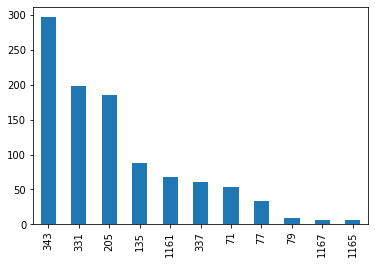

In [21]:
AS['OP_CARRIER_FL_NUM'].value_counts().plot(kind='bar')

These flight dates have the most delays flights in this airline. 

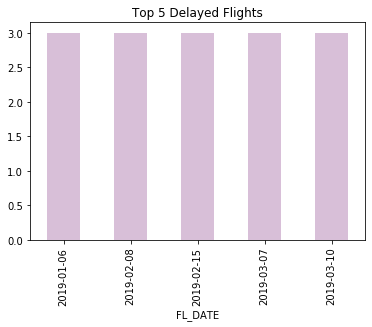

In [58]:
AS[AS['ARR_DELAY'] > 14].groupby(['FL_DATE']).size().nlargest().plot(kind='bar',color='thistle', title='Top 5 Delayed Flights')

This is the flight in which had the longest air time traveling from EWR to JFK. It took 6 hours and 41 minutes to reach its destination. 

In [22]:
AS[AS['AIR_TIME']==AS['AIR_TIME'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
27524,1,3,2,6,2019-03-02,AS,1161,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,747.0,17.0,1245.0,110.0,0.0,401.0,2454.0,17.0,0.0,93.0,0.0,0.0,True,False,False,2,True,False,True,False,False


I have identified the flight in which had the highest delay time and arrival time. Arrival delays are caused by carrier, weather, NAS, security, or late aircraft. This flight had the longest arrival time due to carrier delay which is an issue within control of the airline. 

In [45]:
AS[(AS['ARR_DELAY']==AS['ARR_DELAY'].max()) & (AS['DEP_DELAY']==AS['DEP_DELAY'].max())]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
30205,2,6,29,6,2019-06-29,AS,331,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,151.0,386.0,424.0,349.0,0.0,313.0,2454.0,0.0,0.0,0.0,0.0,349.0,True,False,False,2,False,False,False,False,True


In addition I have discovered a flight has arrival delays when the delay is over 14 minutes depending on the type of delays. 

In [24]:
ASdelays = AS[(AS['class'] ==2 ) & (AS['ARR_DELAY'] > 14)]
ASdelays

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
25750,1,1,24,4,2019-01-24,AS,77,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,2343.0,248.0,257.0,237.0,0.0,337.0,2454.0,0.0,0.0,0.0,0.0,237.0,True,False,False,2,False,False,False,False,True
25842,1,1,8,2,2019-01-08,AS,1161,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,743.0,13.0,1122.0,32.0,0.0,357.0,2454.0,13.0,0.0,19.0,0.0,0.0,True,False,False,2,True,False,True,False,False
25849,1,1,10,4,2019-01-10,AS,77,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,2105.0,90.0,29.0,89.0,0.0,354.0,2454.0,0.0,0.0,0.0,0.0,89.0,True,False,False,2,False,False,False,False,True
25855,1,1,11,5,2019-01-11,AS,77,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,2018.0,43.0,2322.0,22.0,0.0,337.0,2454.0,0.0,0.0,0.0,0.0,22.0,True,False,False,2,False,False,False,False,True
25992,1,1,1,2,2019-01-01,AS,77,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1839.0,39.0,2205.0,24.0,0.0,361.0,2454.0,0.0,0.0,0.0,0.0,24.0,True,False,False,2,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35158,4,12,9,1,2019-12-09,AS,331,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,2021.0,76.0,2339.0,69.0,0.0,341.0,2454.0,0.0,0.0,0.0,0.0,69.0,True,False,False,2,False,False,False,False,True
35164,4,12,10,2,2019-12-10,AS,331,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,2028.0,83.0,2359.0,89.0,0.0,358.0,2454.0,0.0,0.0,6.0,0.0,83.0,True,False,False,2,False,False,True,False,True
35168,4,12,11,3,2019-12-11,AS,331,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1953.0,48.0,2334.0,64.0,0.0,344.0,2454.0,0.0,0.0,16.0,0.0,48.0,True,False,False,2,False,False,True,False,True
35172,4,12,23,1,2019-12-23,AS,205,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,945.0,120.0,1319.0,127.0,0.0,322.0,2454.0,0.0,0.0,7.0,0.0,120.0,True,False,False,2,False,False,True,False,True


I am looking into when a flight has a security delay to idenitfy is there is a patern. A security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas. 

In [25]:
AS[(AS['class'] ==2 )  & (AS['SECURITY_DELAY'] > 0)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
27901,2,4,10,3,2019-04-10,AS,135,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,741.0,11.0,1056.0,16.0,0.0,347.0,2454.0,0.0,0.0,5.0,11.0,0.0,True,False,False,2,False,False,True,True,False
32724,3,9,2,1,2019-09-02,AS,331,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,2307.0,222.0,234.0,244.0,0.0,308.0,2454.0,0.0,0.0,22.0,222.0,0.0,True,False,False,2,False,False,True,True,False
35149,4,12,7,6,2019-12-07,AS,343,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1625.0,30.0,1943.0,21.0,0.0,352.0,2454.0,0.0,0.0,0.0,21.0,0.0,True,False,False,2,False,False,False,True,False


Below is a visual of all the reasons for an airline delay. We can see late aircraft arrival is the main reason for a flight to be delayed. The next leading cause of a delay is NAS. 

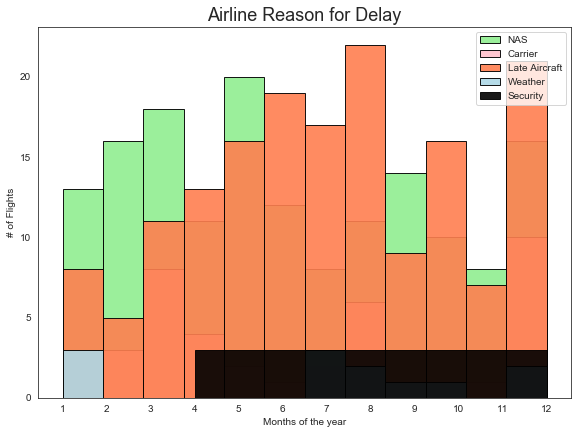

In [28]:
delays(AS)

In [29]:
AS[['delay_carrier','delay_weather','delay_nas','delay_security','delay_late_aircraft']].sum()

delay_carrier           42
delay_weather           12
delay_nas              157
delay_security           3
delay_late_aircraft    164
dtype: int64

In [44]:
AS['class'].value_counts()

3    636
2    361
1      8
Name: class, dtype: int64

Alaska Airlines had a total of 8 canclled flights. 

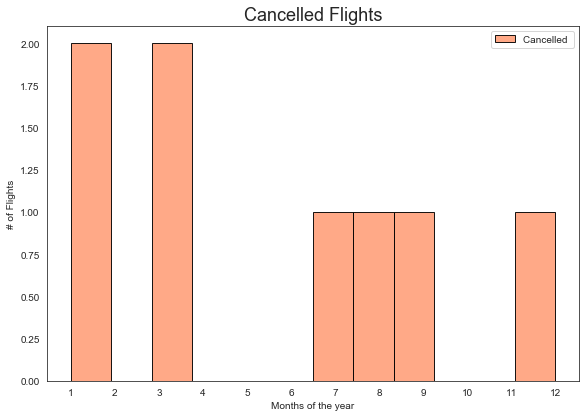

In [31]:
cancellation(AS)

# United Airlines

In [32]:
UA

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
25666,1,1,26,6,2019-01-26,UA,758,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,613.0,13.0,907.0,-22.0,0.0,322.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
25667,1,1,26,6,2019-01-26,UA,703,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,754.0,-6.0,1032.0,-57.0,0.0,319.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25669,1,1,26,6,2019-01-26,UA,600,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1950.0,-10.0,2228.0,-55.0,0.0,314.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25673,1,1,26,6,2019-01-26,UA,204,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,855.0,-5.0,1148.0,-27.0,0.0,302.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25675,1,1,25,5,2019-01-25,UA,2394,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1357.0,-3.0,1702.0,-21.0,0.0,332.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35565,4,12,8,7,2019-12-08,UA,2023,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1259.0,-1.0,1616.0,7.0,0.0,345.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
35568,4,12,8,7,2019-12-08,UA,1871,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1903.0,3.0,2227.0,2.0,0.0,337.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
35569,4,12,8,7,2019-12-08,UA,1702,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1059.0,-1.0,1424.0,15.0,0.0,355.0,2454.0,0.0,0.0,15.0,0.0,0.0,False,True,False,3,False,False,True,False,False
35570,4,12,8,7,2019-12-08,UA,1460,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1603.0,3.0,1912.0,-2.0,0.0,341.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False


These flight dates have the most delays flights in this airline. 

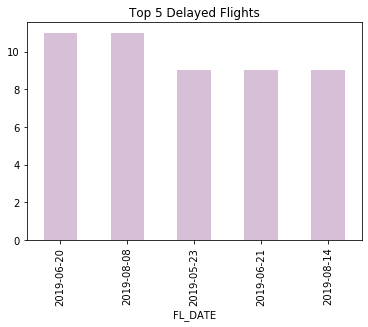

In [57]:
UA[UA['ARR_DELAY'] > 14].groupby(['FL_DATE']).size().nlargest().plot(kind='bar',color='thistle', title='Top 5 Delayed Flights')

United Airlines has more flights travelling to LAX than Alaska Airlines. Fligth703 travels the most to the destination. 

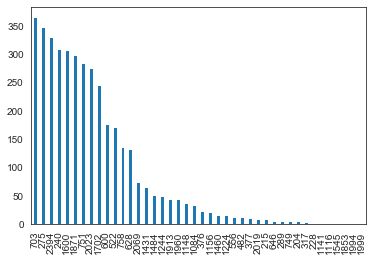

In [33]:
UA['OP_CARRIER_FL_NUM'].value_counts().plot(kind='bar')

The United Airline in which had the longesr air time is about 400 minutes. The air time is about 5 hours and 45 minutes. It seems to be the flight was delayed because of NAS reasons. 

In [34]:
UA[UA['AIR_TIME']==UA['AIR_TIME'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
34188,4,11,27,3,2019-11-27,UA,2023,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1300.0,0.0,1712.0,63.0,0.0,400.0,2454.0,0.0,0.0,63.0,0.0,0.0,False,True,False,3,False,False,True,False,False


I have identified the flight in which had the longest delay time and arrival time. This flight seems to have a lot of reason for delays such as weather, NAS, and late aircraft.

In [46]:
UA[(UA['ARR_DELAY']==UA['ARR_DELAY'].max()) & (UA['DEP_DELAY']==UA['DEP_DELAY'].max())]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
31267,3,8,7,3,2019-08-07,UA,1600,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1030.0,1051.0,1413.0,1090.0,0.0,347.0,2454.0,0.0,576.0,39.0,0.0,475.0,True,False,False,2,False,True,True,False,True


In addition I have discovered a flight has arrival delays when the delay is over 14 minutes depending on the type of delays. 

In [36]:
UAdelays = UA[(UA['class'] ==2 ) & (UA['ARR_DELAY'] > 14)]
UAdelays

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
25712,1,1,11,5,2019-01-11,UA,1148,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,924.0,24.0,1301.0,46.0,0.0,325.0,2454.0,0.0,0.0,22.0,0.0,24.0,True,False,False,2,False,False,True,False,True
25728,1,1,10,4,2019-01-10,UA,1148,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,914.0,14.0,1231.0,16.0,0.0,319.0,2454.0,14.0,0.0,2.0,0.0,0.0,True,False,False,2,True,False,True,False,False
25732,1,1,10,4,2019-01-10,UA,600,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,2157.0,117.0,55.0,92.0,0.0,332.0,2454.0,0.0,0.0,0.0,0.0,92.0,True,False,False,2,False,False,False,False,True
25775,1,1,2,3,2019-01-02,UA,1600,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1715.0,15.0,2015.0,15.0,0.0,320.0,2454.0,15.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
25779,1,1,2,3,2019-01-02,UA,1148,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1340.0,280.0,1610.0,233.0,0.0,306.0,2454.0,233.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35524,4,12,10,2,2019-12-10,UA,1871,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1949.0,49.0,2319.0,54.0,0.0,348.0,2454.0,17.0,0.0,5.0,0.0,32.0,True,False,False,2,True,False,True,False,True
35526,4,12,10,2,2019-12-10,UA,1460,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1747.0,107.0,2130.0,136.0,0.0,340.0,2454.0,3.0,0.0,29.0,0.0,104.0,True,False,False,2,True,False,True,False,True
35529,4,12,10,2,2019-12-10,UA,628,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,2039.0,39.0,1.0,51.0,0.0,340.0,2454.0,7.0,0.0,12.0,0.0,32.0,True,False,False,2,True,False,True,False,True
35541,4,12,9,1,2019-12-09,UA,2069,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1001.0,1.0,1340.0,22.0,0.0,330.0,2454.0,0.0,0.0,22.0,0.0,0.0,True,False,False,2,False,False,True,False,False


There seems to be no security reason for there to be a delay.

In [37]:
UA[(UA['class'] ==2 )  & (UA['SECURITY_DELAY'] > 0)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft


United Airlines seems to have more delays than Alaska Airlines but UA does have more flights travelling. The main reason for a delay is NAS and the second leading cause of a delay is carrier therefore its an issue within the airline. 

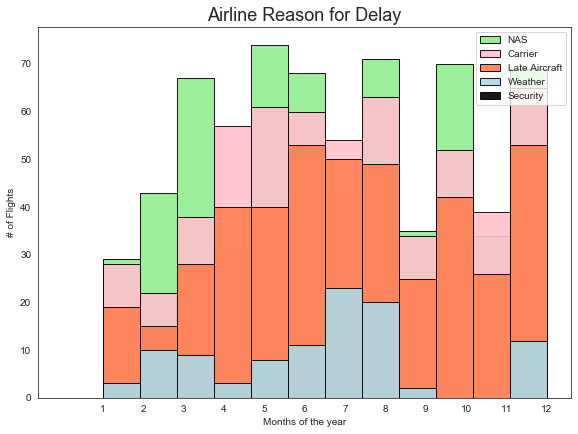

In [38]:
delays(UA)

In [39]:
UA[['delay_carrier','delay_weather','delay_nas','delay_security','delay_late_aircraft']].sum()

delay_carrier          573
delay_weather          101
delay_nas              632
delay_security           0
delay_late_aircraft    440
dtype: int64

We can see United Airlines had 27 flights cancelled in 2019. It is about 3 times as much as Alaska Airlines. 

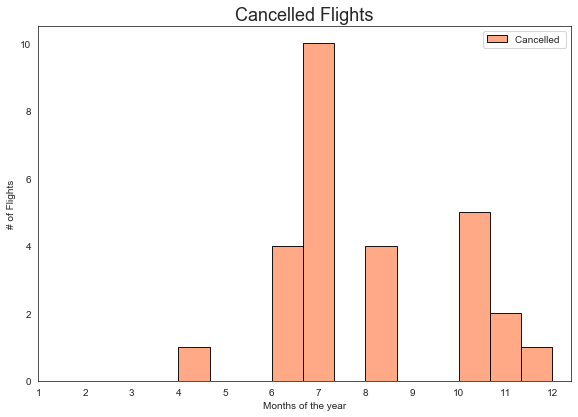

In [40]:
cancellation(UA)

In [47]:
UA['class'].value_counts()

3    2232
2    1691
1      27
Name: class, dtype: int64

# Holidays

I have decided to look into flights that have delayed around the holidays. 

In [41]:
delay = EWR[EWR['ARR_DELAY'] > 13].groupby(['OP_UNIQUE_CARRIER']).count()
delay

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
OP_UNIQUE_CARRIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AS,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,268,268,268,268,268,274,274,274,274,274,274,274,274,274
UA,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1046,1046,1046,1046,1046,1082,1082,1082,1082,1082,1082,1082,1082,1082


In [80]:
EWR[(EWR['FL_DATE'] =='2019-11-27' ) & (EWR['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
AS    2
UA    7
dtype: int64

In [96]:
EWR[(EWR['FL_DATE'] =='2019-11-28' ) & (EWR['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
AS    1
UA    2
dtype: int64

In [125]:
EWR[(EWR['FL_DATE'] =='2019-12-23' ) & (EWR['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
AS    1
UA    2
dtype: int64

In [107]:
EWR[(EWR['FL_DATE'] =='2019-12-30' ) & (EWR['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
AS    1
UA    1
dtype: int64

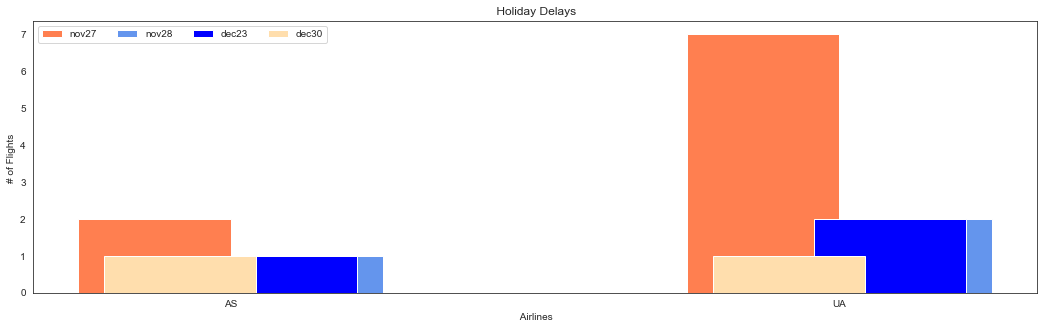

In [126]:
f, ax = plt.subplots(figsize=(18,5)) 

    ### Setting the labels of the X axis
labels = ['AS','UA']

nov27 = EWR[(EWR['FL_DATE'] =='2019-11-27' ) & (EWR['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()
nov28 = EWR[(EWR['FL_DATE'] =='2019-11-28' ) & (EWR['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()
dec23 = EWR[(EWR['FL_DATE'] =='2019-12-23') & (EWR['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()
dec30 = EWR[(EWR['FL_DATE'] =='2019-12-30' ) & (EWR['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()
    ### X- Label locations 
x = np.arange(len(labels))
    ### Width of the bars
width = 0.25  
    ### Code to plot the bars 
rect1= ax.bar(x - width/2, nov27, width, label = 'nov27',color = 'coral')
rect2= ax.bar(x + width/2, nov28, width, label = 'nov28',color = 'cornflowerblue')
rect3= ax.bar(x + width/3, dec23, width, label = 'dec23',color = 'blue')
rect4= ax.bar(x - width/3, dec30, width, label = 'dec30',color = 'navajowhite')
    ### Set the x-ticks
ax.set_xticks(x)
    ### Setting labels 
ax.set_xticklabels(labels)
    ### Labeling the X axis
ax.set_xlabel(" Airlines")
    ### Y axis Label
ax.set_ylabel("# of Flights ")
    ### Title of Graoh
ax.set_title(" Holiday Delays")
    ### Showing the legend 
ax.legend(ncol=4)
    ### Show graph
plt.show()

It seems November 27, a day before Thanksgiving had the most delayed flights. Rather than Christmas and New Years.

# Weather

I have gathered the fligth dates with the highest delay because of weather. I will look into this. 

In [137]:
EWR[EWR['WEATHER_DELAY'] > 0].groupby(['FL_DATE']).size().nlargest(7)


FL_DATE
2019-02-20    6
2019-06-20    6
2019-12-01    6
2019-03-02    5
2019-07-06    5
2019-07-11    5
2019-02-12    4
dtype: int64